In [1]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 41.8 MB/s eta 0:00:0000:0100:01


In [2]:
from LoadData import load_data

In [3]:
X_train, y_train, X_val, y_val, trainlist, vallist = load_data()

100% 30330/30330 [03:37<00:00, 139.38it/s]
100% 7583/7583 [00:54<00:00, 138.85it/s]


In [4]:
print(len(trainlist), len(vallist))

30330 7583


In [5]:
X_train.extend(X_val)
y_train.extend(y_val)
trainlist.extend(vallist)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [8]:
nonzero_pixelcount = []
for l in tqdm(y_train):
    nonzero_pixelcount.append(np.count_nonzero(l))
nonzero_pixelcount = np.array(nonzero_pixelcount)

100% 37913/37913 [00:00<00:00, 219000.16it/s]


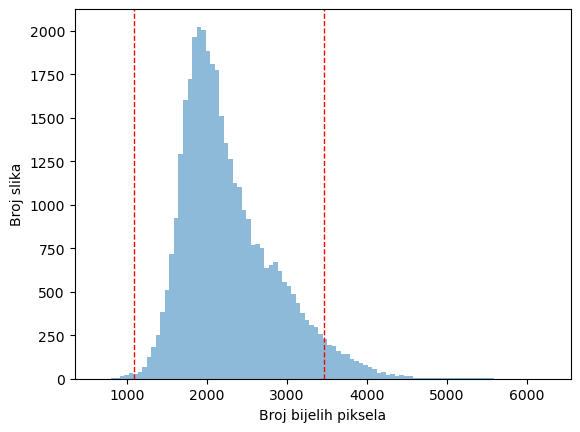

In [34]:
mean = np.mean(nonzero_pixelcount)
std_dev = np.std(nonzero_pixelcount)

lower_bound = mean - 2*std_dev
upper_bound = mean + 2*std_dev

plt.hist(nonzero_pixelcount, bins=100, alpha=0.5)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1)
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=1)
plt.xlabel("Broj bijelih piksela")
plt.ylabel("Broj slika")
plt.savefig("hist.png")
plt.show()

In [15]:
outlierI = np.where((nonzero_pixelcount < 1200))[0]
outlierI.shape

(153,)

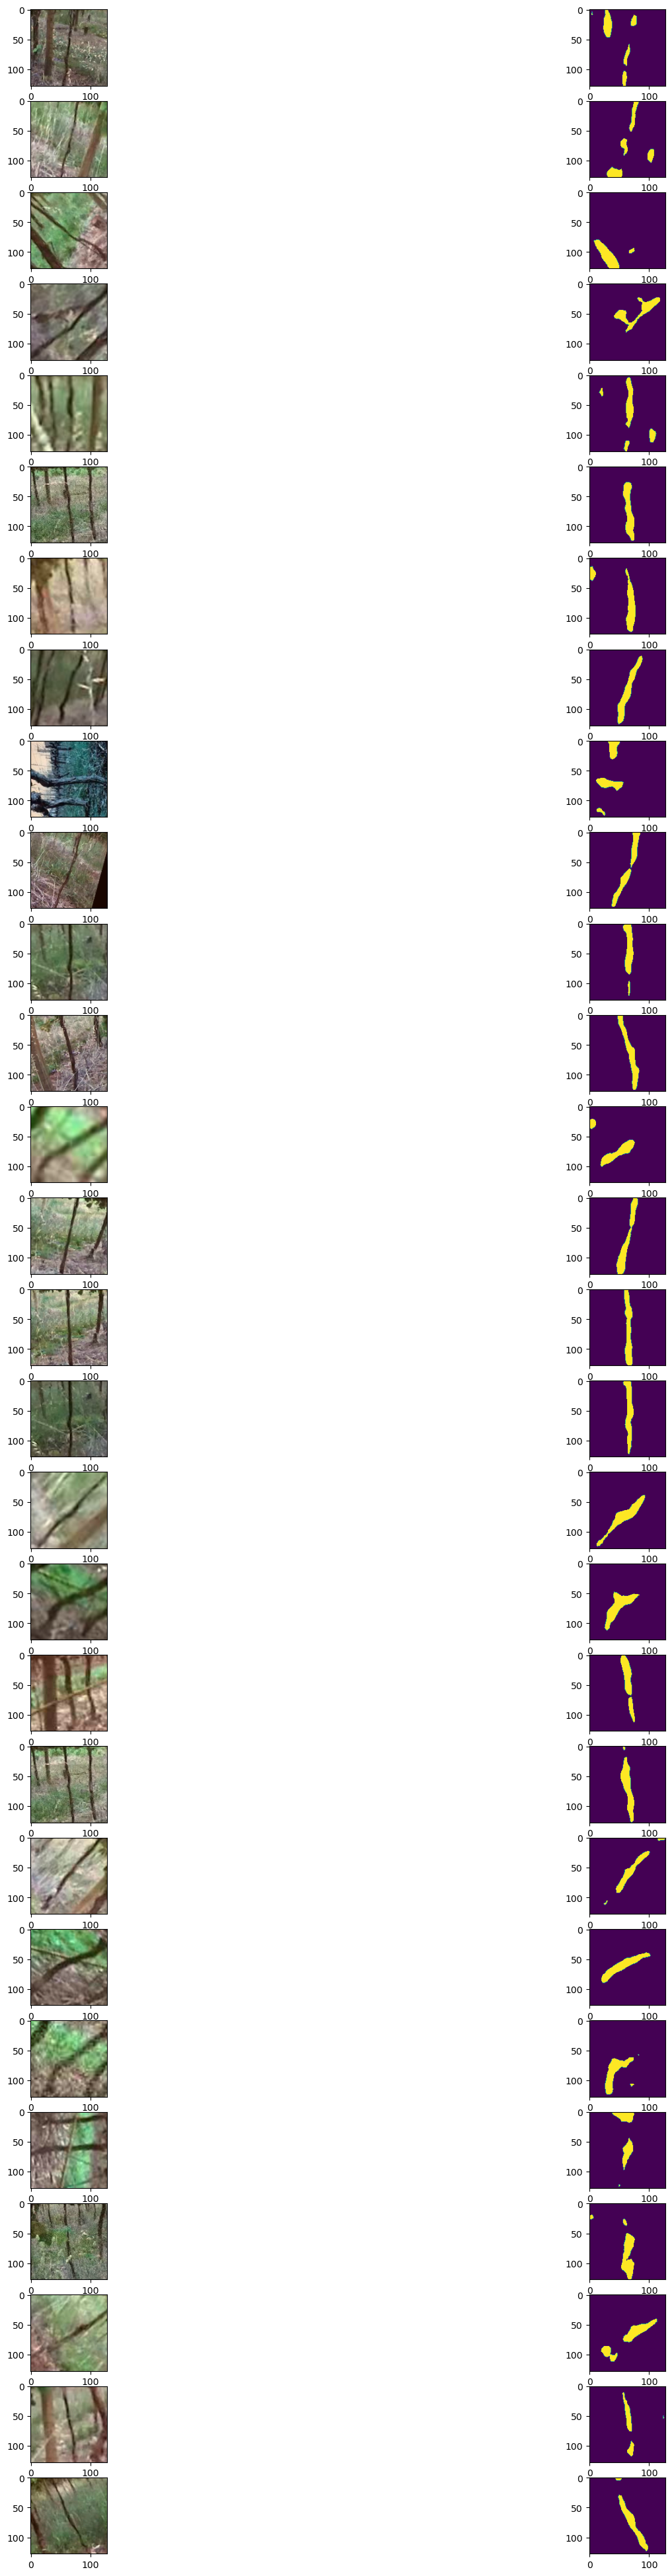

In [9]:
num = 28
fig, axs = plt.subplots(num, 2, figsize=(20,50))
for i, ax in enumerate(axs):
    ax[0].imshow(X_train[outlierI[i]])
    ax[1].imshow(y_train[outlierI[i]])

In [10]:
num_objects = []
for l in tqdm(y_train):
    contours, _ = cv2.findContours(l, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    num_objects.append(len(contours))
num_objects = np.array(num_objects)

100% 37913/37913 [00:00<00:00, 43452.21it/s]


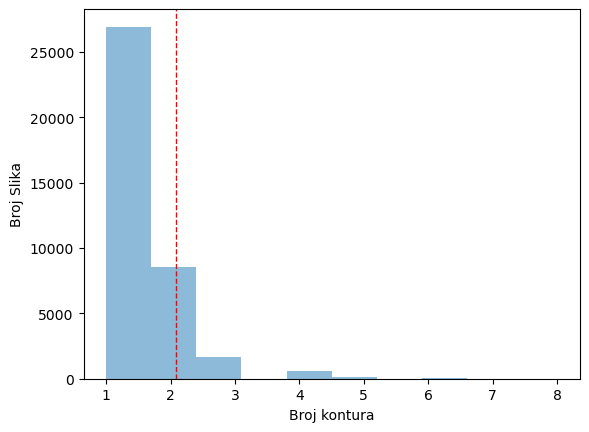

In [31]:
mean = np.mean(num_objects)
std_dev = np.std(num_objects)

plt.hist(num_objects, bins=10, alpha=0.5)
plt.axvline(np.average(num_objects)+np.std(num_objects), color='red', linestyle='dashed', linewidth=1)
plt.xlabel("Broj kontura")
plt.ylabel("Broj Slika")
plt.savefig("contour_count.png")
plt.show()

In [22]:
outlierI_cont = np.where((num_objects >= 3))[0]
outlierI_cont.shape

(2406,)

In [12]:
nonzero_pixelcount.shape

(37913,)

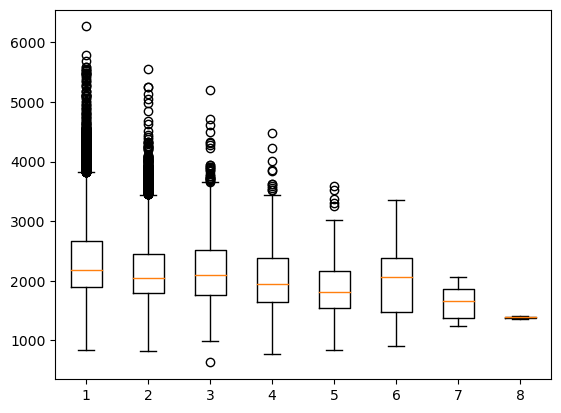

In [27]:
data = []
for i in range(8):
    data.append(nonzero_pixelcount[np.where(num_objects==i+1)])
    
plt.boxplot(data)
plt.show()

In [28]:
np.average(num_objects)

1.380845620235803

In [29]:
np.std(num_objects)

0.7026063908731165

In [24]:
import random

True

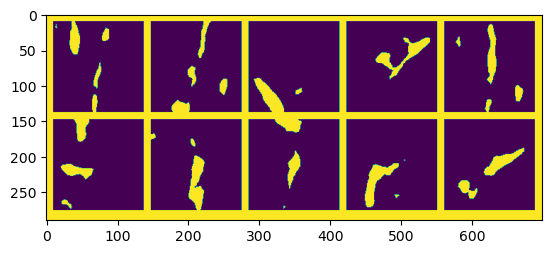

In [43]:

img_list = outlierI
#chosen_imgs = random.choices(img_list, k=10)
chosen_imgs = np.take(outlierI, [0,1,2,3,4,8,24, 23, 22, 25])

final_img = np.ones((290, 700), np.uint8) * 255

pad = 10
shape = 128
x = pad
y = pad
for i, img_name in enumerate(chosen_imgs):
    img = y_train[img_name]
    final_img[y:y+shape, x:x+shape] = img
    x += shape + pad

    if x >= final_img.shape[1]:
        x = pad
        y += shape + pad
plt.imshow(final_img)
cv2.imwrite("num_sample.png", final_img)

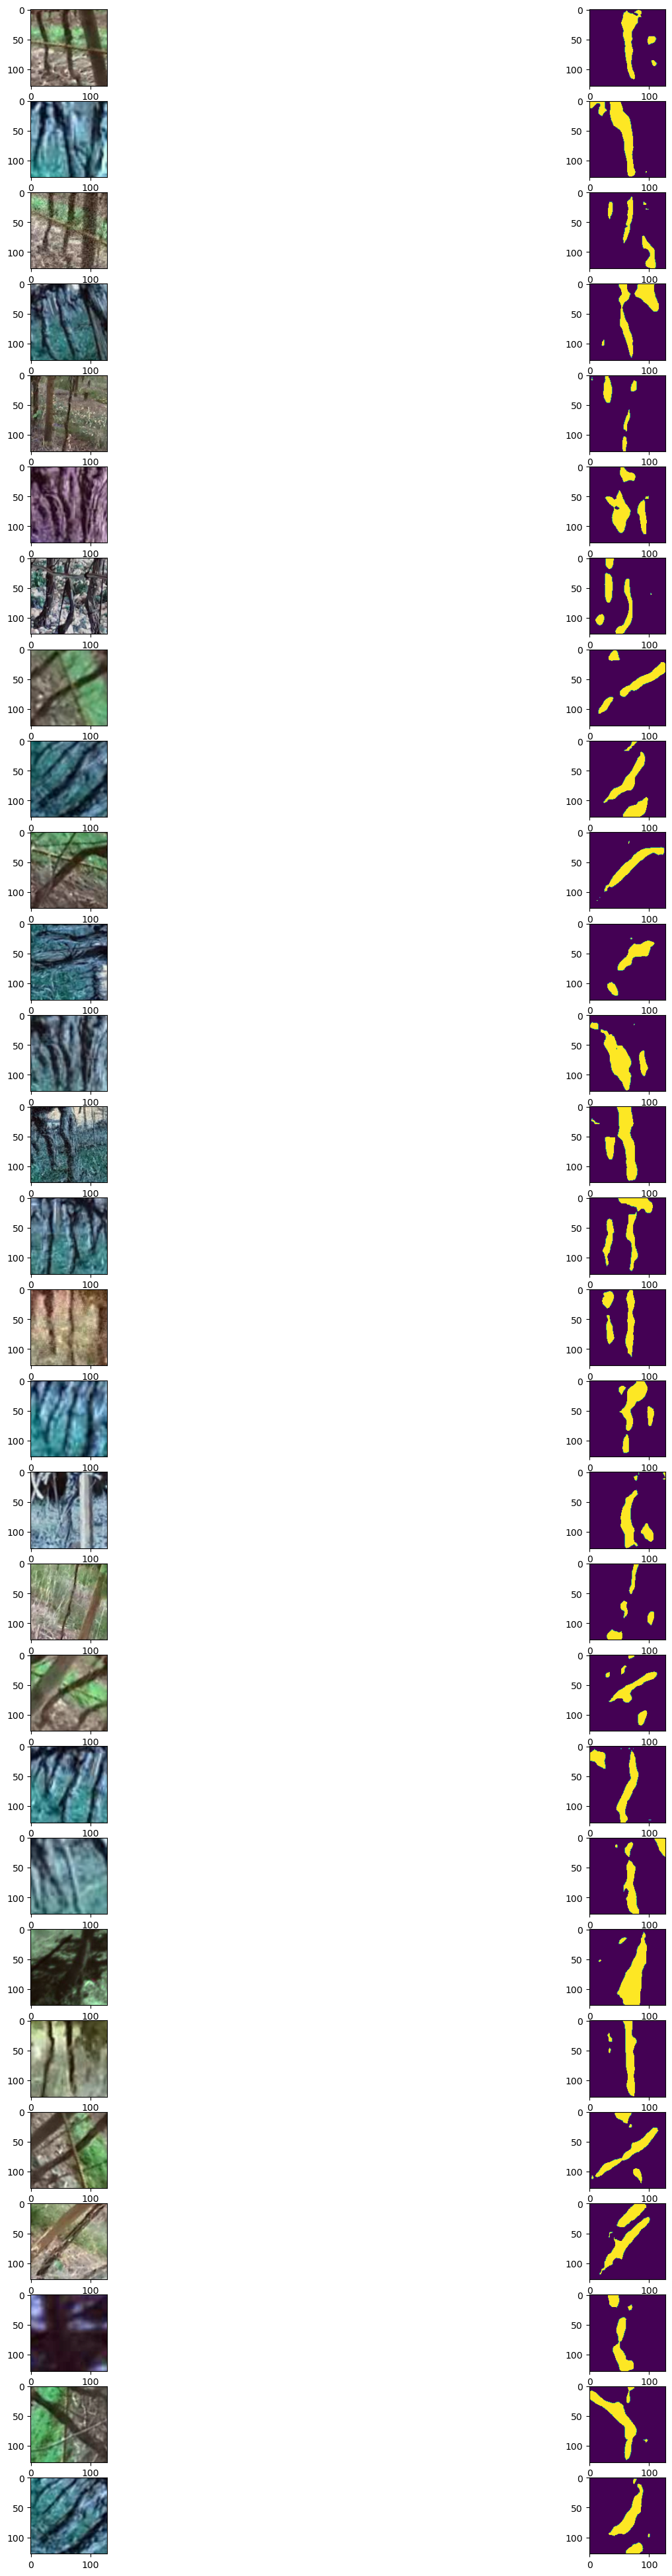

In [13]:
num = 28
fig, axs = plt.subplots(num, 2, figsize=(20,50))
for i, ax in enumerate(axs):
    ax[0].imshow(X_train[outlierI_cont[i]])
    ax[1].imshow(y_train[outlierI_cont[i]])

In [16]:
print(outlierI.shape, outlierI_cont.shape)

(153,) (2406,)


In [17]:
outliersI = np.concatenate((outlierI, outlierI_cont))
outliersI.shape

(2559,)

In [23]:
train_removed = 0
with open('vineset/train_clean.lst', 'w') as f:
    for i, line in enumerate(trainlist[:len(trainlist)-len(vallist)]):
        if i in outliersI:
            train_removed += 1
            continue
        
        f.write(line)
print(f"{train_removed=}")

val_removed = 0
with open('vineset/val_clean.lst', 'w') as f:
    for i, line in enumerate(trainlist[len(trainlist)-len(vallist):]):
        if i in outliersI:
            val_removed += 1
            continue
        
        f.write(line)
print(f"{val_removed=}")

train_removed=2018
val_removed=498


In [24]:
## CHECK FOR DATALEAK
with open('vineset/train_clean.lst', 'r') as f:
        trainlist = f.readlines()
with open('vineset/val_clean.lst', 'r') as f:
        vallist = f.readlines()
for l in trainlist:
    if l in vallist:
        print("DATA LEAK")